In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [44]:
def plot_points(x,y):
    accepted=x[np.argwhere(y==1)]
    rejected=x[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected], s=25, color='red', edgecolor='k')
    plt.scatter([s[0][0] for s in accepted],[s[0][1] for s in accepted], s=25, color='blue', edgecolor='k')
    
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x=np.arange(-10,10,0.2)
    plt.plot(x,m*x+b,color)
    

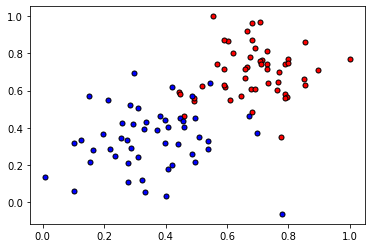

In [45]:
data=pd.read_csv('data.csv',header=None)
X=np.array(data[[0,1]])
Y=np.array(data[2])

plot_points(X,Y)
plt.show()

In [46]:
def sigmoid(x):
    sig=1/(1+np.exp(-x))
    return sig

def output_formula(X,w,b):
    out=sigmoid(np.dot(X,w.T)+b)
    return out

def error_formula(y,output):
    s=y.shape
    error=-(np.dot(y.T,np.log(output))-np.dot((1-y).T,np.log((1-output))))
    return error

def update_weights(x, y, weights, bias, learnrate):
    out=sigmoid(np.dot(x,weights.T)+bias)
    del_b=out-y
    del_w=np.dot(x.T, (out-y.T).T)
    weights=weights-learnrate*del_w
    bias=bias-learnrate*del_b

    return weights,bias
    

In [47]:
np.random.seed(44)

epochs=100
l=0.01

def train(x,y,epochs,learnrate,graph_lines=False):
    m,n=x.shape
    w=np.random.normal(scale=1/n**.5, size=n)
    b=0
    errors=[]
    last_loss=None
    
    for e in range(epochs):
        for X, Y in zip(x,y):
            w,b=update_weights(X,Y,w,b,l)
        
        out=output_formula(x,w,b)
        loss = np.mean(error_formula(y, out))
        errors.append(loss)  
        
        if e%10==0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            predictions = out > 0.5
            accuracy = np.mean(predictions == y)
            print("Accuracy: ", accuracy)
            
        if graph_lines and e % (epochs / 100) == 0:
            display(-w[0]/w[1], -b/w[1])
            
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-w[0]/w[1], -b/w[1], 'black')

    # Plotting the data
    plot_points(x,y)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  -0.163588580396393
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  17.31078024236241   WARNING - Loss Increasing
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  14.805218621137747
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  12.628815990964291
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  10.957125901546405
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  9.651681227425705
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  8.612377653826847
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  7.770072757127927
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  7.076380783073374
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  6.4968476494124126
Accuracy:  0.94


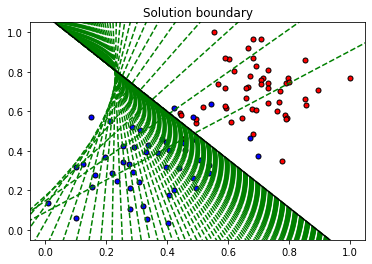

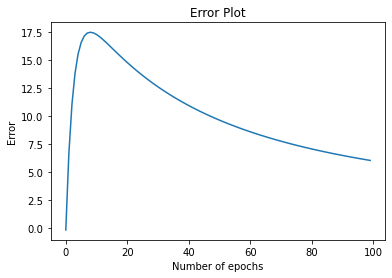

In [48]:
train(X, Y, epochs, l, True)